第 0 次： [[-2.18515433]
 [-1.61444749]
 [-0.69629723]
 [-1.82834808]
 [-0.85643004]
 [ 0.31744647]
 [ 0.63306684]
 [-1.10708361]
 [-0.8722647 ]
 [-0.61719474]
 [ 0.25040916]
 [ 1.98989368]
 [-1.21029044]
 [ 2.29707965]]
第 1 次： [[-3.34946236]
 [-2.40085089]
 [-1.10934732]
 [-2.69906254]
 [-1.34285302]
 [ 0.55546391]
 [ 0.90899613]
 [-1.67486402]
 [-1.33409315]
 [-0.96286099]
 [ 0.30487434]
 [ 3.04616652]
 [-1.93990087]
 [ 3.5153314 ]]
第 2 次： [[-3.98197534]
 [-2.76240482]
 [-1.36822551]
 [-3.07481018]
 [-1.63080906]
 [ 0.74934022]
 [ 1.00663997]
 [-1.96721456]
 [-1.57400274]
 [-1.15941901]
 [ 0.26262158]
 [ 3.61421648]
 [-2.41423679]
 [ 4.17325886]]
第 3 次： [[-4.33708354]
 [-2.90789409]
 [-1.5410962 ]
 [-3.19597975]
 [-1.81046206]
 [ 0.91771551]
 [ 1.01784192]
 [-2.12049469]
 [-1.69156616]
 [-1.27190148]
 [ 0.17455416]
 [ 3.9260112 ]
 [-2.75113891]
 [ 4.54029414]]
第 4 次： [[-4.54713768]
 [-2.94514708]
 [-1.66428292]
 [-3.18739563]
 [-1.92950476]
 [ 1.07052969]
 [ 0.98938488]
 [-2.20489267]
 

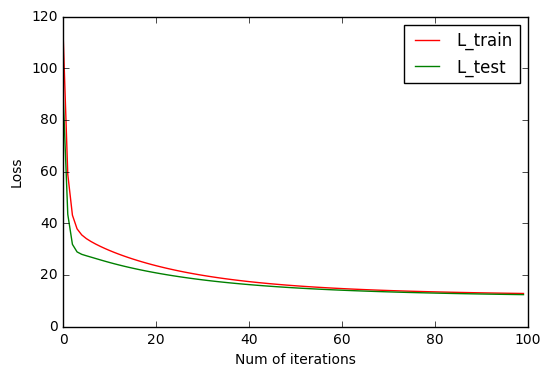

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file

learningRate=0.38
G=np.zeros((14,1))
D=np.zeros((14,1))

data = load_svmlight_file("housing_scale.txt")
X, y = data[0], data[1]

X=X.dot(np.eye(13))
b=np.ones((506,1))
X=np.column_stack((X,b))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

w=np.zeros((14,1))

n_train=X_train.shape[0]
n_test=X_test.shape[0]

y=y.reshape(506,1)
y_train=y_train.reshape(354,1)
y_test=y_test.reshape(152,1)

L_train=np.zeros(200)
L_test=np.zeros(200)

for i in range(200):
    for j in range(14):
        G[j]=(((X_train.dot(w)-y_train).T).dot(X_train[:,j]))/n_train
    D = -G
    w=w+learningRate*D
    L_train[i]=((X_train.dot(w)-y_train).T).dot(X_train.dot(w)-y_train)/2/n_train
    L_test[i]=((X_test.dot(w)-y_test).T).dot(X_test.dot(w)-y_test)/2/n_test
    #print("第",i,"次：\n","L_train:",L_train[i],"  L_test:",L_test[i])
    
print(L_train[199],"\n",L_test[199])    
x=np.arange(0,200,1)
%matplotlib inline
plt.plot(x,L_train,'r',label='L_train')
plt.plot(x,L_test,'g',label='L_test')
plt.legend(loc='upper right')
plt.xlabel('iterator times  (learningRate=0.38)')
plt.ylabel('Loss')

In [22]:
print(X_train[:,2])

[ 0.293255  -0.43695   -0.456745   1.        -0.406158  -0.596774   0.40176
  0.293255  -0.299853  -0.299853  -0.736804  -0.781525  -0.52346    0.40176
  0.293255   0.293255   0.293255  -0.563783  -0.579179   0.293255   0.571114
  0.293255  -0.58871    0.293255   0.40176   -0.323314   0.293255   0.293255
 -0.818915  -0.604106  -0.406158   0.293255   0.40176    0.068915   0.40176
 -0.579179  -0.8739    -0.677419  -0.604106   0.40176    0.40176   -0.925953
 -0.579179  -0.0931085 -0.307918   0.293255  -0.604106  -0.299853  -0.815982
 -0.587243   0.293255   0.293255   0.293255  -0.579179  -0.742669  -0.579179
  0.293255   0.293255  -0.596774  -0.922287   0.571114   0.293255  -0.604106
 -0.643695   0.293255  -0.657625  -0.299853  -0.783724  -0.742669  -0.456745
  0.293255  -0.159091  -0.922287   0.40176    0.40176   -0.736804   0.293255
 -0.853372  -0.307918  -0.456745   0.293255  -0.406158  -0.677419  -0.596774
 -0.307918   0.40176    0.293255  -0.869501  -0.0131965 -0.922287   0.293255
  

In [21]:
print(y_train)

[[ 14.6]
 [ 16.6]
 [ 27.1]
 [ 20.1]
 [ 19.8]
 [ 21. ]
 [ 41.3]
 [ 23.2]
 [ 20.4]
 [ 18.5]
 [ 29.4]
 [ 36.4]
 [ 24.4]
 [ 11.8]
 [ 13.8]
 [ 12.3]
 [ 17.8]
 [ 33.1]
 [ 26.7]
 [ 13.4]
 [ 14.4]
 [ 50. ]
 [ 22. ]
 [ 19.9]
 [ 23.8]
 [ 17.5]
 [ 12.7]
 [  5.6]
 [ 31.1]
 [ 26.2]
 [ 19.4]
 [ 16.7]
 [ 13.8]
 [ 22.9]
 [ 15.3]
 [ 27.5]
 [ 36.1]
 [ 22.9]
 [ 24.5]
 [ 25. ]
 [ 50. ]
 [ 34.9]
 [ 31.7]
 [ 24.1]
 [ 22.1]
 [ 14.1]
 [ 42.8]
 [ 19.3]
 [ 32.2]
 [ 26.4]
 [ 21.8]
 [ 21.7]
 [  8.3]
 [ 46.7]
 [ 43.1]
 [ 31.5]
 [ 10.5]
 [ 16.7]
 [ 20. ]
 [ 33.3]
 [ 17.8]
 [ 50. ]
 [ 20.5]
 [ 23.2]
 [ 13.1]
 [ 19.6]
 [ 22.8]
 [ 28.7]
 [ 30.7]
 [ 22.9]
 [ 21.9]
 [ 23.9]
 [ 32.7]
 [ 24.3]
 [ 21.5]
 [ 24.6]
 [  8.5]
 [ 26.4]
 [ 23.1]
 [ 15. ]
 [  8.8]
 [ 19.3]
 [ 23.9]
 [ 24.7]
 [ 19.8]
 [ 23.8]
 [ 13.3]
 [ 29. ]
 [ 27.1]
 [ 34.6]
 [ 13.3]
 [ 15.6]
 [ 12.5]
 [ 14.6]
 [ 11. ]
 [ 24.8]
 [ 17.3]
 [  8.1]
 [ 21.4]
 [ 15.6]
 [ 23.3]
 [ 32. ]
 [ 38.7]
 [ 30.1]
 [ 20.5]
 [ 32.5]
 [ 42.3]
 [ 24.3]
 [ 20.6]
 [ 22. ]
 [ 18.2]
 